In [47]:
import numpy as np
import scipy as sp
import pandas as pd 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import RANSACRegressor, LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score


import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
wine_data = pd.read_csv('../Dataset/winequality-white.csv', sep=';')
red_wine = pd.read_csv('../Dataset/winequality-red.csv', sep=';')
sns.set(style='whitegrid', context='notebook', font_scale=1)

In [3]:
wine_data.append(red_wine)
wine_data.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   
5            8.1              0.28         0.40             6.9      0.050   
6            6.2              0.32         0.16             7.0      0.045   
7            7.0              0.27         0.36            20.7      0.045   
8            6.3              0.30         0.34             1.6      0.049   
9            8.1              0.22         0.43             1.5      0.044   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   
5                 30.0                  97.0   0.9951  3.26       0.44   
6                 30.0                 136.0   0.9949  3.18       0.47   
7                 45.0                 170.0   1.0010  3.00       0.45   
8                 14.0                 132.0   0.9940  3.30       0.49   
9                 28.0                 129.0   0.9938  3.22       0.45   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6  
5     10.1        6  
6      9.6        6  
7      8.8        6  
8      9.5        6  
9     11.0        6

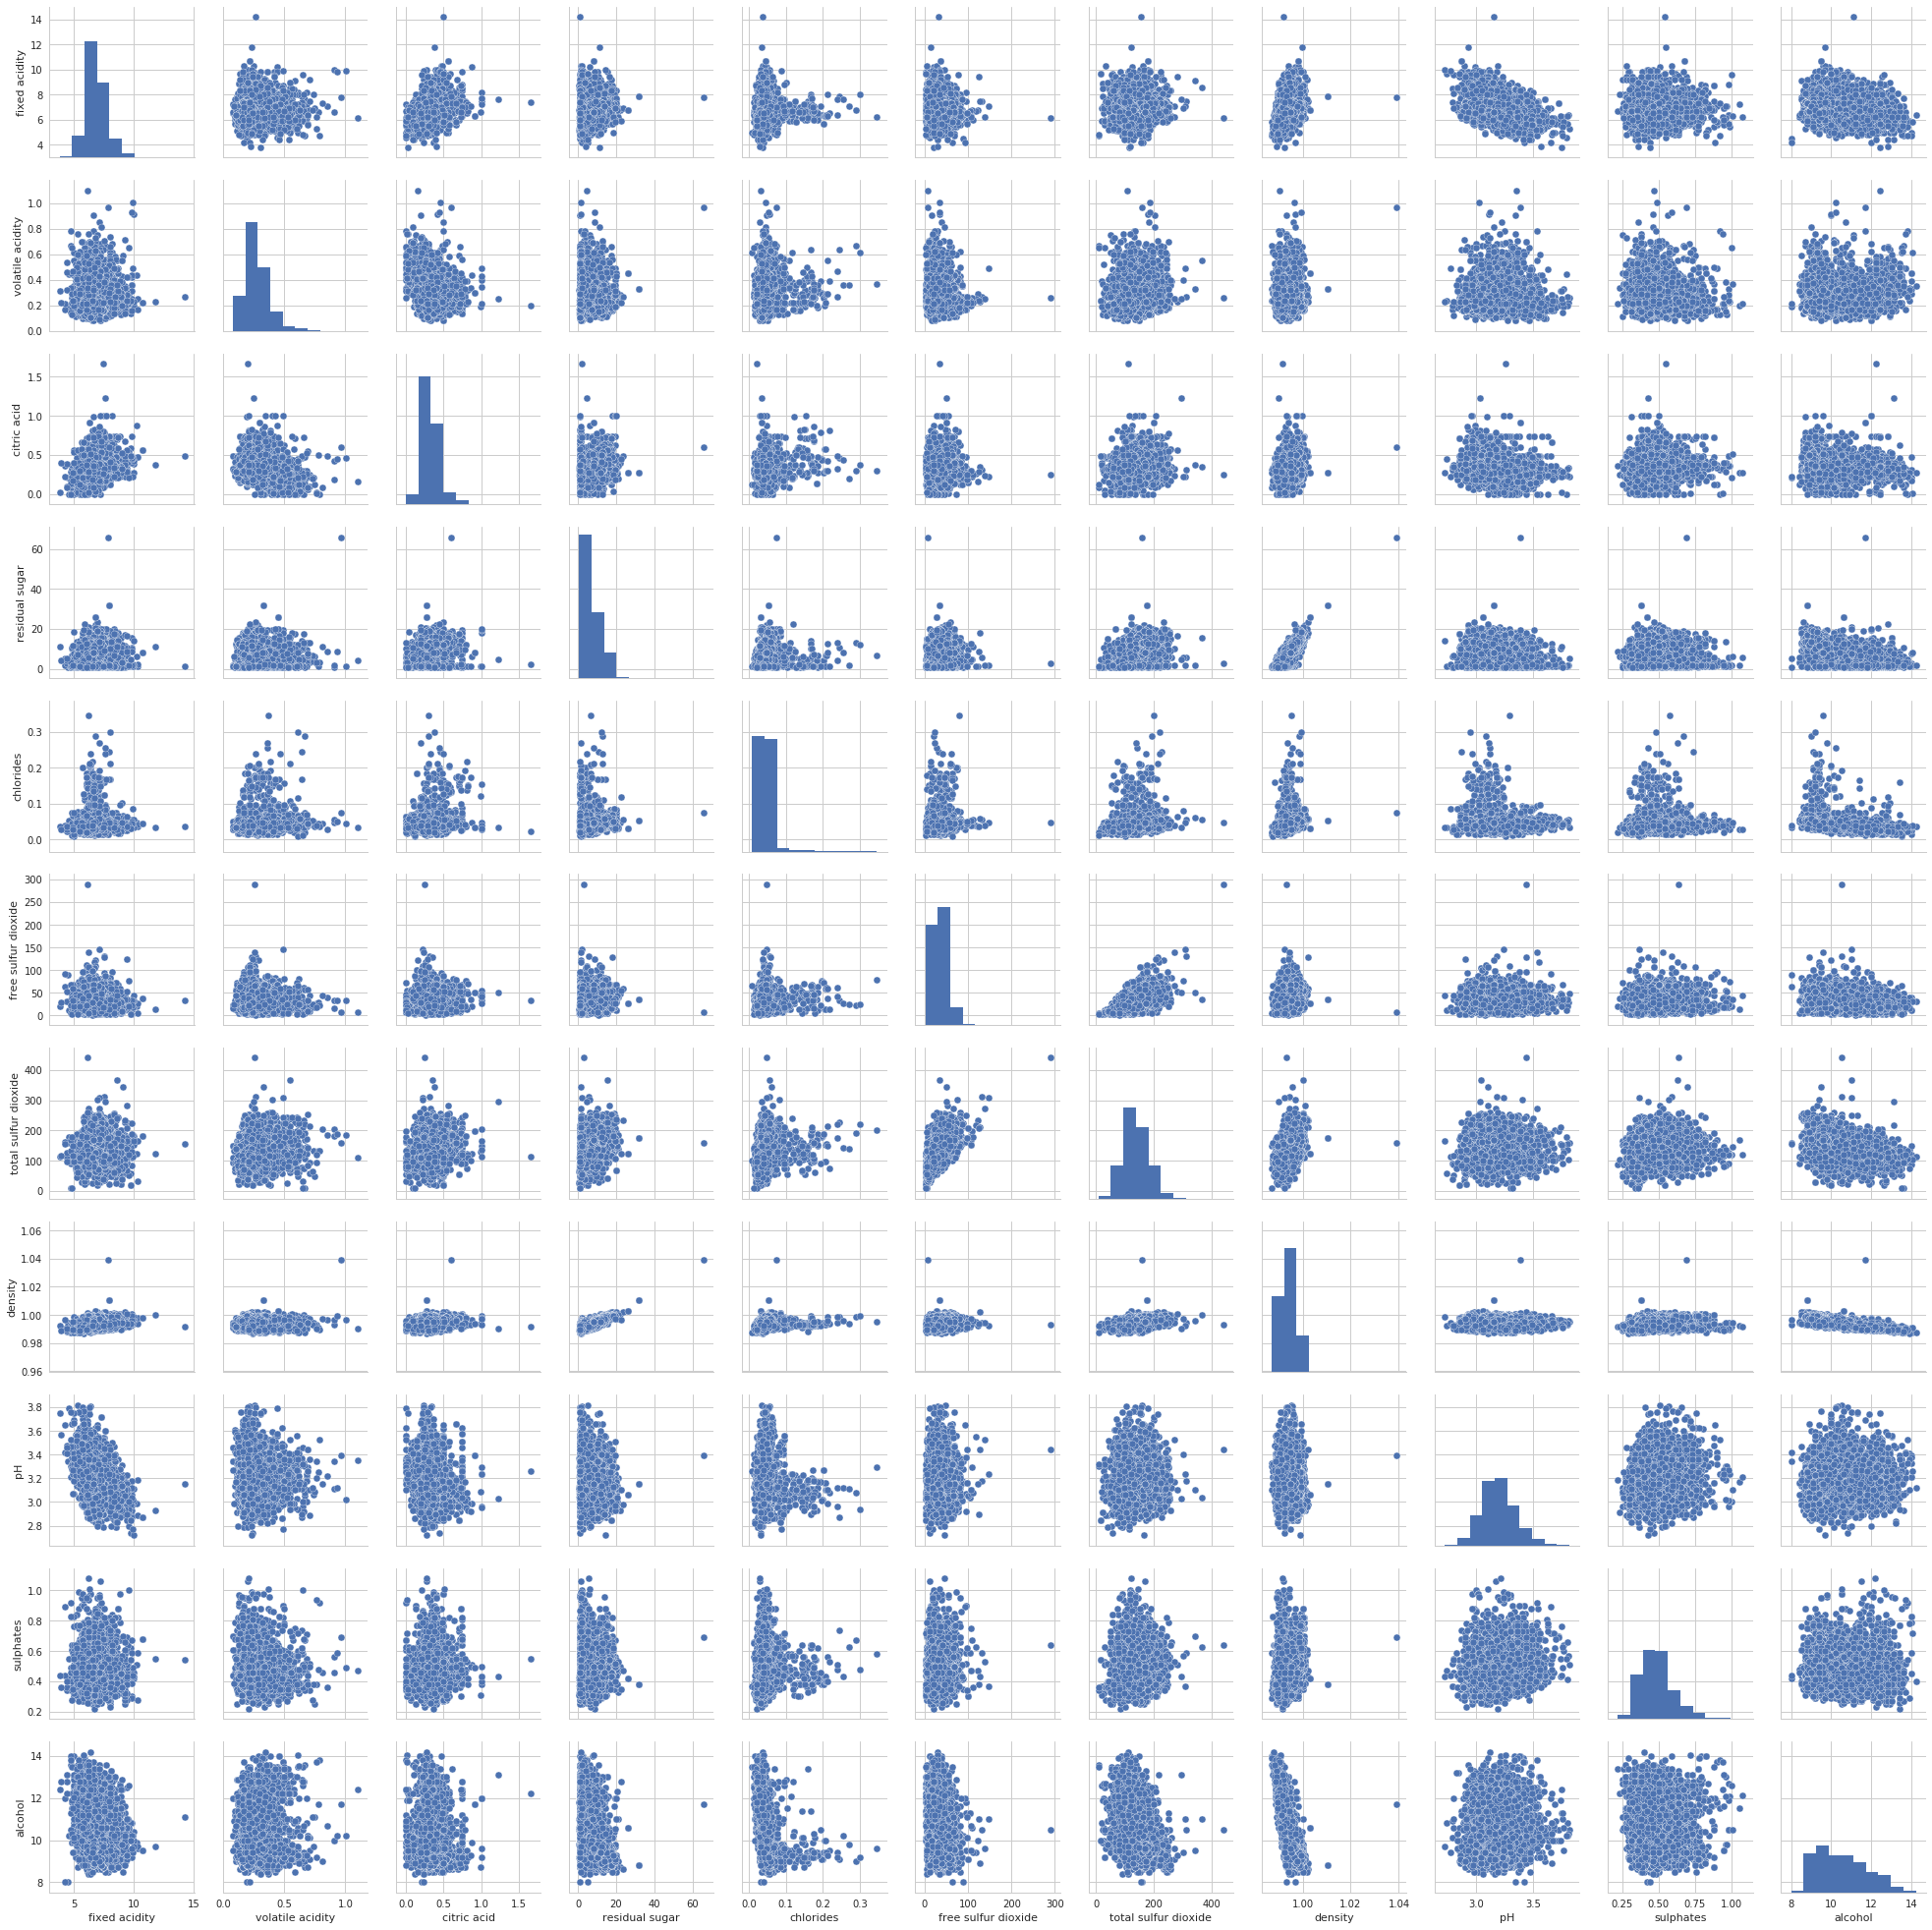

In [4]:
sns.pairplot(wine_data.iloc[:,:11], size=2.5)

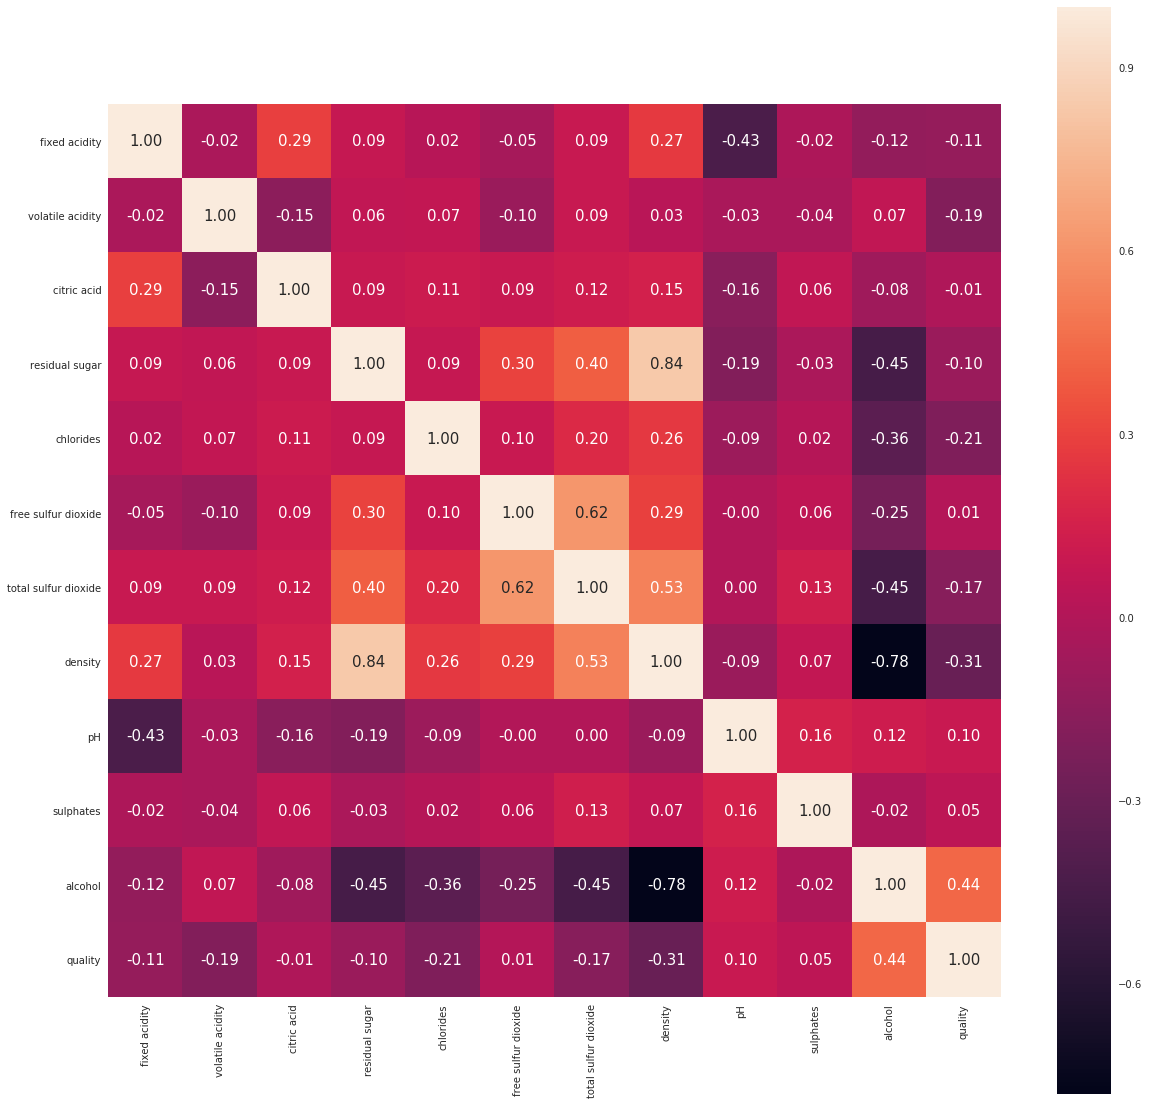

In [5]:
cm = np.corrcoef(wine_data.values.T)
plt.figure(figsize=(20,20))
hm = sns.heatmap(cm, cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size':15}, 
                 yticklabels=wine_data.columns.values, 
                 xticklabels=wine_data.columns.values)
plt.show()

# Applying Linear Regression with Gradient Descent

In [6]:
class  LinearRegressionGD(object):

    def __init__(self, eta=0.000001, n_iter=600):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            print("Cost at step ", i, " is: ", cost)
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

Cost at step  0  is:  2449.0
Cost at step  1  is:  2432.15535499795
Cost at step  2  is:  2415.475316028501
Cost at step  3  is:  2398.9582745599237
Cost at step  4  is:  2382.602637779075
Cost at step  5  is:  2366.4068284377972
Cost at step  6  is:  2350.369284700817
Cost at step  7  is:  2334.488459995131
Cost at step  8  is:  2318.7628228608614
Cost at step  9  is:  2303.1908568035715
Cost at step  10  is:  2287.7710601480217
Cost at step  11  is:  2272.501945893358
Cost at step  12  is:  2257.3820415697137
Cost at step  13  is:  2242.4098890962105
Cost at step  14  is:  2227.5840446403513
Cost at step  15  is:  2212.9030784787833
Cost at step  16  is:  2198.3655748594247
Cost at step  17  is:  2183.970131864937
Cost at step  18  is:  2169.715361277529
Cost at step  19  is:  2155.599888445091
Cost at step  20  is:  2141.622352148623
Cost at step  21  is:  2127.7814044709726
Cost at step  22  is:  2114.075710666846
Cost at step  23  is:  2100.5039490340932
Cost at step  24  is:  208

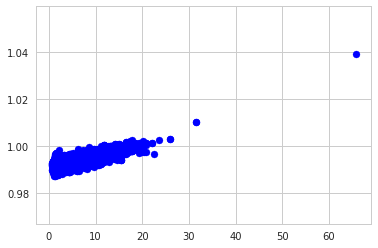

In [7]:
X = wine_data[['residual sugar']].values
y = wine_data['density'].values

sc_X = StandardScaler()
sc_Y = StandardScaler()
X_std = sc_X.fit_transform(X)
Y_std = sc_Y.fit_transform(y[:, np.newaxis]).flatten()

plt.scatter(X, y, c='blue')

lr = LinearRegressionGD()
lr.fit(X_std, Y_std)
plt.show()

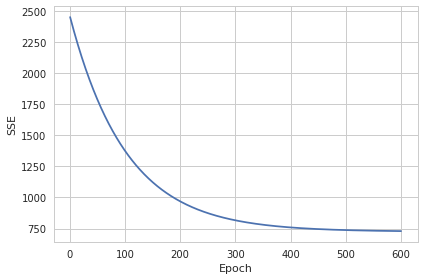

In [40]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.tight_layout()
plt.show()

In [9]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red', linewidth=2)    
    return None


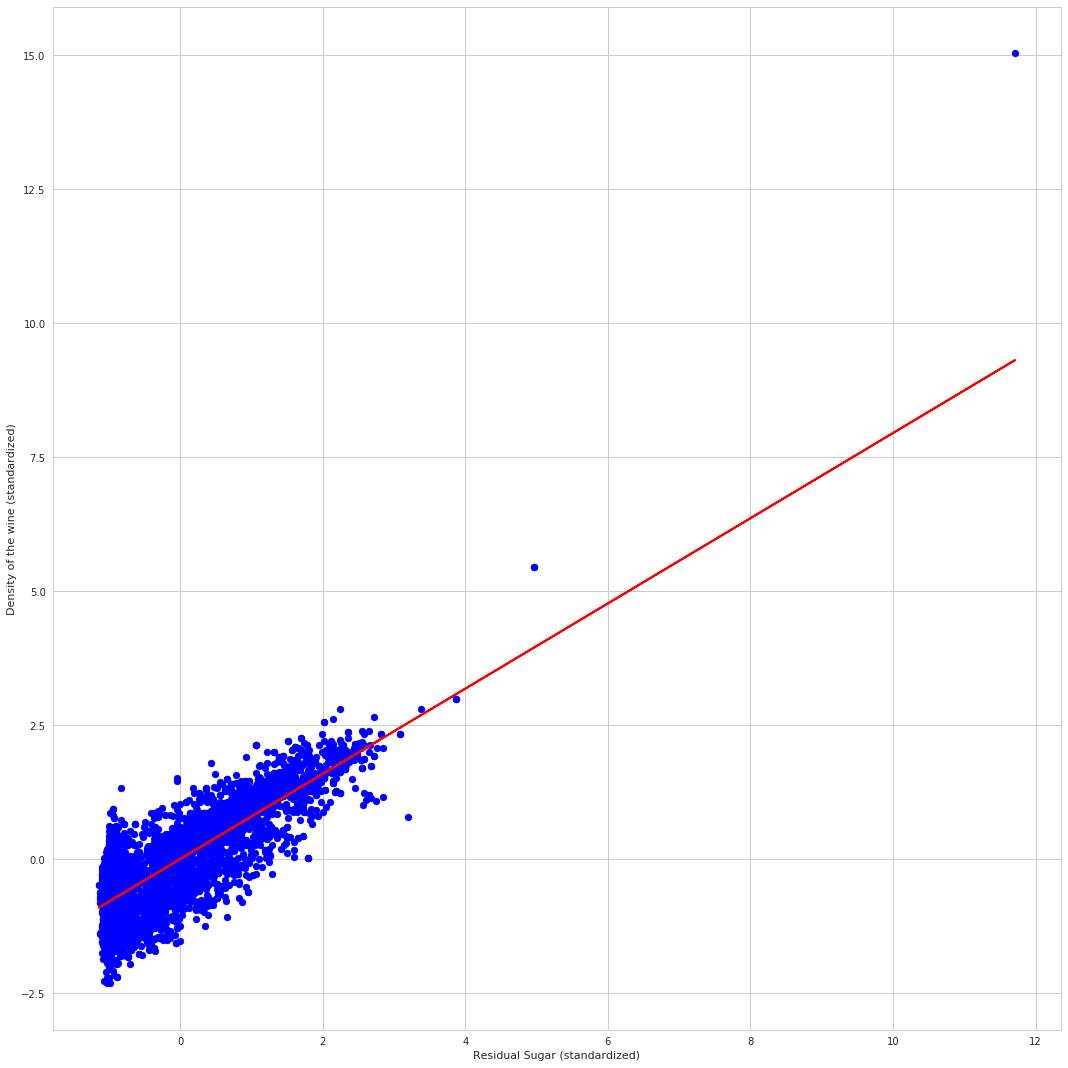

In [12]:
plt.figure(figsize=(15,15))
lin_regplot(X_std, Y_std, lr)
plt.xlabel('Residual Sugar (standardized)')
plt.ylabel('Density of the wine (standardized)')
plt.tight_layout()
plt.show()

# Applying a vanilla Linear Regression to the dataset 

In [13]:
X = wine_data[['total sulfur dioxide']].values
y = wine_data['density'].values

slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: %.7f' %slr.coef_[0])
print('Intercept: %.7f' %slr.intercept_)

Slope: 0.0000373
Intercept: 0.9888677


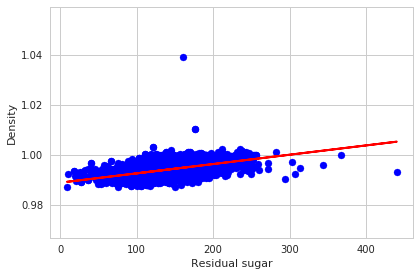

In [14]:
lin_regplot(X, y, slr)
plt.xlabel('Residual sugar')
plt.ylabel('Density')
plt.tight_layout()
# plt.savefig('./figures/scikit_lr_fit.png', dpi=300)
plt.show()

In [15]:
# adding a column vector of "ones"# adding 
Xb = np.hstack((np.ones((X.shape[0], 1)), X))
w = np.zeros(X.shape[1])
z = np.linalg.inv(np.dot(Xb.T, Xb))
w = np.dot(z, np.dot(Xb.T, y))

print('Slope: %.7f' % w[1])
print('Intercept: %.7f' % w[0])

Slope: 0.0000373
Intercept: 0.9888677


# Applying RANSAC regression over the dataset

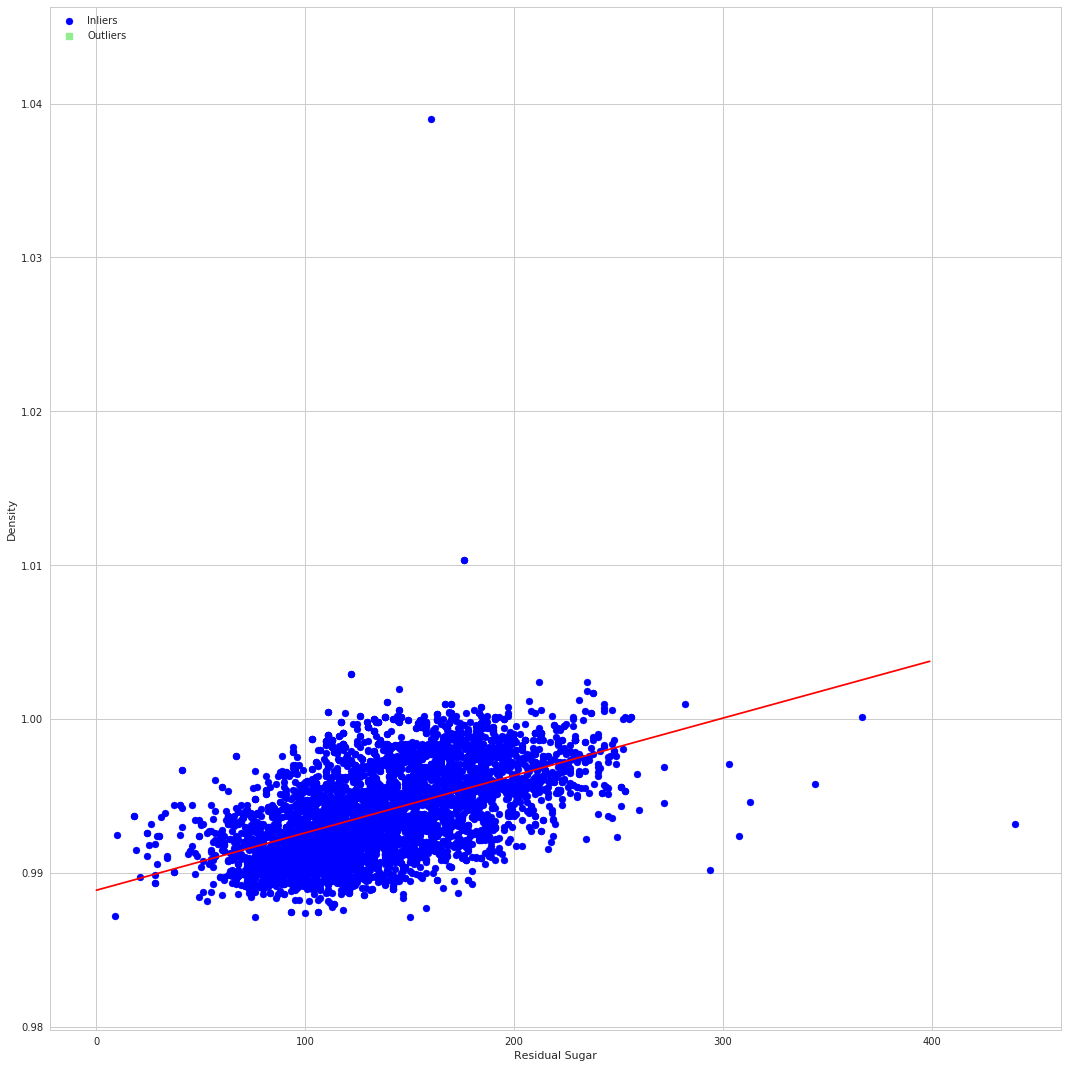

In [17]:
X = wine_data[['total sulfur dioxide']].values
y = wine_data['density'].values

ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=1000, 
                         min_samples=50, 
                         loss='absolute_loss', 
                         residual_threshold=5.0, 
                         random_state=0)

ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(0, 400, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])

plt.figure(figsize=(15, 15))
plt.scatter(X[inlier_mask], y[inlier_mask], c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], c='lightgreen', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')   
plt.xlabel('Residual Sugar')
plt.ylabel('Density')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [18]:
print('Slope: %.7f' % ransac.estimator_.coef_[0])
print('Intercept: %.7f' % ransac.estimator_.intercept_)

Slope: 0.0000373
Intercept: 0.9888677


# Evaluating the performance of linear regression models

In [49]:
X = wine_data[['total sulfur dioxide']]
Y = wine_data['density']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [52]:
slr = LinearRegression()

slr.fit(X_train, Y_train)
Y_train_pred = slr.predict(X_train)
Y_test_pred = slr.predict(X_test)

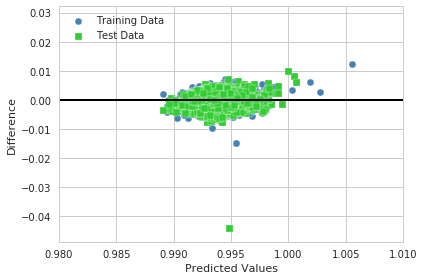

In [53]:
plt.scatter(Y_train_pred, Y_train_pred - Y_train, 
            c ='steelblue', marker='o', edgecolor='white', 
            label='Training Data')
plt.scatter(Y_test_pred, Y_test_pred - Y_test, 
            c='limegreen', marker='s', edgecolor='white', 
            label='Test Data')
plt.xlabel('Predicted Values')
plt.ylabel('Difference')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0.98, xmax=1.01, color='black', lw=2)
plt.xlim([0.98, 1.01])
plt.tight_layout()

plt.show()

In [46]:
print('MSE train: %.3f, test: %.3f'%(
    mean_squared_error(Y_train, Y_train_pred),
    mean_squared_error(Y_test, Y_test_pred)))
print('R_squared train: %.3f, test: %.3f'%(
    r2_score(Y_train, Y_train_pred),
    r2_score(Y_test, Y_test_pred)))

print('Explained Variance train: %.3f, test: %.3f'%(
    explained_variance_score(Y_train, Y_train_pred),
    explained_variance_score(Y_test, Y_test_pred)))

MSE train: 0.000, test: 0.000
R_squared train: 0.302, test: 0.223
Explained Variance train: 0.302, test: 0.226


# Turning a linear regression model into a curve - polynomial regression and modelling non linear relationships

In [48]:
X = wine_data[['total sulfur dioxide']]
Y = wine_data['density']

In [78]:
lr = LinearRegression()
pr = LinearRegression()
cr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cub = cubic.fit_transform(X)

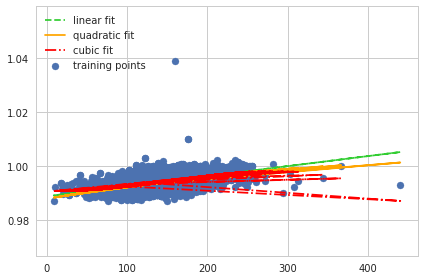

In [79]:
lr.fit(X, Y)

# fit quadratic features
pr.fit(X_quad, Y)
cr.fit(X_cub, Y)
Y_lin_fit = lr.predict(X)
Y_quad_fit = pr.predict(quadratic.fit_transform(X))
Y_cub_fit = cr.predict(cubic.fit_transform(X))

# plot results
plt.scatter(X, Y, label='training points')
plt.plot(X, Y_lin_fit, label='linear fit', linestyle='--', color='limegreen')
plt.plot(X, Y_quad_fit, label='quadratic fit', color='orange')
plt.plot(X, Y_cub_fit, label='cubic fit', linestyle='-.', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/10_10.png', dpi=300)
plt.show()

In [80]:
Y_lin_pred = lr.predict(X)
Y_quad_pred = pr.predict(X_quad)
Y_cub_pred = cr.predict(X_cub)

In [82]:
print('Training MSE linear: %.3f, quadratic: %.3f, cubic: %.3f' % (
        mean_squared_error(Y, Y_lin_pred),
        mean_squared_error(Y, Y_quad_pred),
        mean_squared_error(Y, Y_cub_pred)))
print('Training R^2 linear: %.3f, quadratic: %.3f, cubic: %.3f' % (
        r2_score(Y, Y_lin_pred),
        r2_score(Y, Y_quad_pred),
        r2_score(Y, Y_cub_pred)))

Training MSE linear: 0.000, quadratic: 0.000, cubic: 0.000
Training R^2 linear: 0.281, quadratic: 0.283, cubic: 0.292
